The first part of this workshop is a revised version of the last year's version by Ahmed Ibrahim and Sharon Ho. Inspired by: [Dr Christopher Lovejoy](https://youtu.be/c8s5GKRrenY).

The second part adapts the official PyTorch [tutorial on image classification](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) with convolutional neural networks to a medical domain.

# Neural Networks and Computer Vision 

In the first part of this workshop, we will be using a [dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) that describes the characteristics of cell nuclei obtained from biopsies of patients with breast cancer. We will be building and optimising a simple artificial neural network (specifically a multi-layer perceptron) to predict whether the breast cancer is benign or malignant.
- The first subsection covers the data pre-processing and implementation in scikit-learn
- The second subsection uses PyTorch, which is a more advanced deep learning framework, commonly used by deep learning professionals.


In the second part of the notebook, we will look into chest x-ray images. We will use the available data from the [MedMNIST dataset](https://medmnist.com) to classify whether a patient has pneumonia or not. We will start with a simple neural network and understanding how to implement a training loop. The later part covers the implementation of a more advanced neural architecture -- a convolutional neural network (CNN). 


## Part 1.1: Neural Networks using scikit-learn

For this part of the workshop, we will be using `scikit-learn`. Further in the notebook, you'll have a chance to see how the same machine learning problem can be solved using more advanced framework -- `PyTorch`.

### Importing libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
)

### Importing dataset

In [2]:
dataset = pd.read_csv(
    "https://raw.githubusercontent.com/ahmed-ibrahim0/AIM/main/Breast%20Cancer%20Wisconsin%20Dataset.csv"
)

## Processing the dataset

### Inspecting the dataset

Before diving in to building our neural network, it is a good idea to spend some time understanding our dataset:

In [3]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


It looks like there is a additional column in the dataset ("Unnamed: 32"), it probably got created by mistake. Let's remove it.

In [4]:
dataset.drop(
    columns=["Unnamed: 32"],
    inplace=True,
)
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


The above cell gives a summary of our dataset. We can see that we have 569 breast cancer samples, each of which has been labelled with various histological features describing the nature of the cell nuclei, as well as whether the cancer is benign (B) or malignant (M).

### Dataset features

The cell nuclei features that the dataset includes are:


* radius
* texture (standard deviation of the grey-scale values for each pixel)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension (ratio of the change in detail of the edge to the change in scale at which it is measured - basically just a measure of roughness)

For each feature, we have the mean, standard error and the worst value



The dataset is also split into 357 benign and 212 malignant samples, which is good because we want a roughly even split to give our model the best chance of picking out the important features that discriminate between the two.

### Feature distributions

We can also perform some simple statistical calculations and plot histograms for each feature to get a feel for how they are distributed. For now, we will only be considering the mean values to make our analysis and model simpler.

In [5]:
dataset_mean = dataset.iloc[:, 1:12]
dataset_mean.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>],
       [<Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>],
       [<Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>],
       [<Axes: title={'center': 'fractal_dimension_mean'}>, <Axes: >,
        <Axes: >]], dtype=object)

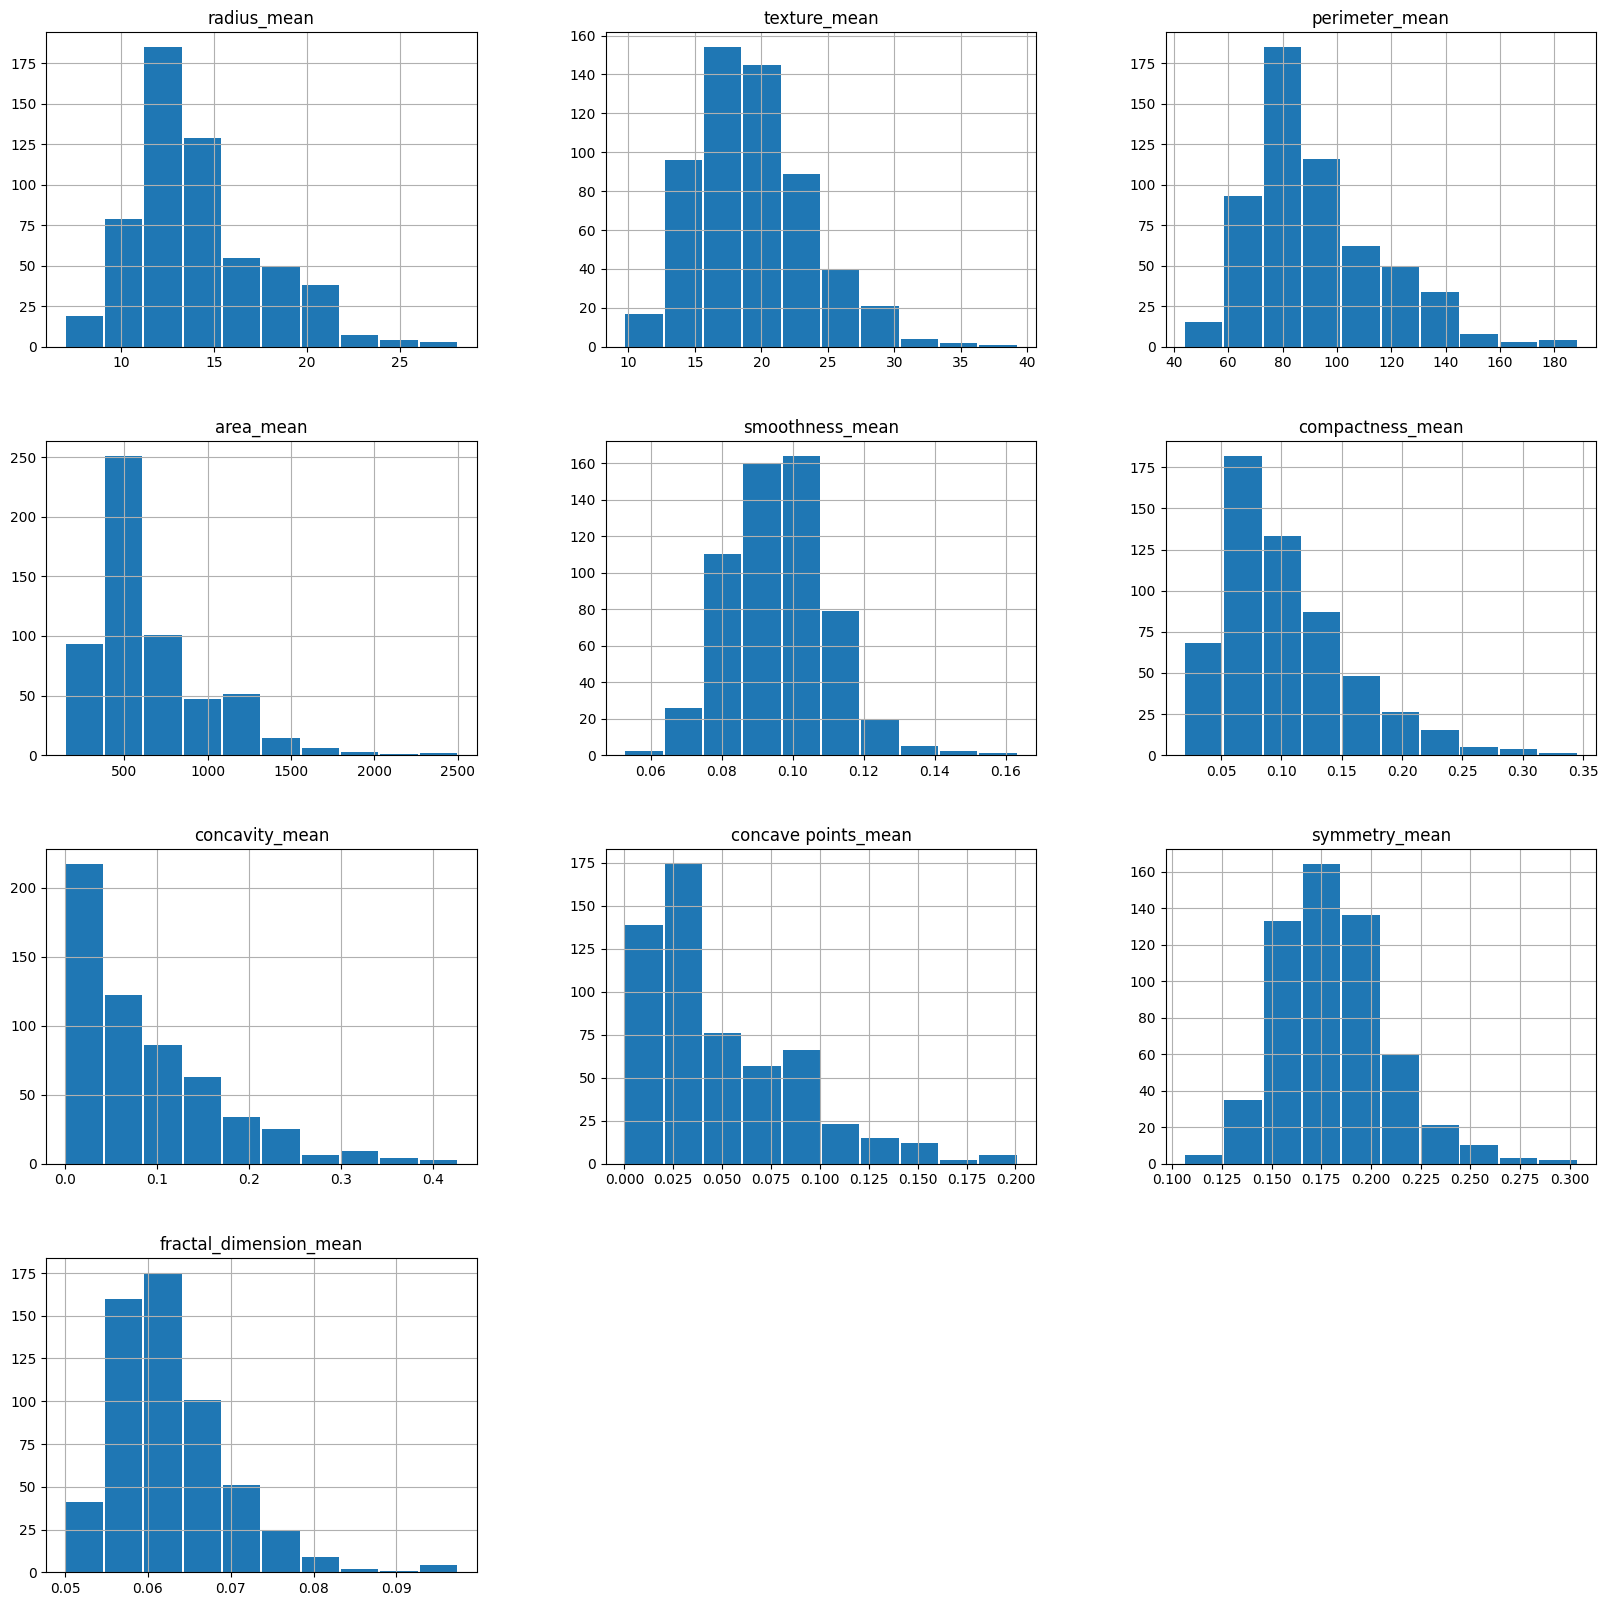

In [6]:
dataset_mean.hist(figsize=(20, 20), rwidth=0.95)

### Splitting the data

Because neural networks can be an example of a supervised machine learning algorithm, we need to split the samples in our dataset into two sets:


*   **Training set** - this is the set that our neural network will learn from
*   **Testing set** - this is the set we will use to assess how good our model is

To do this, we will randomly allocate 80% of the samples to the training set and 20% of the samples to the testing set. It is also a good idea to split off our inputs (cell nuclei features) from our output (benign or malignant) at this stage.



In [7]:
y_dataset_mean = dataset_mean.iloc[:, 0]
x_dataset_mean = dataset_mean.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(
    x_dataset_mean,
    y_dataset_mean,
    test_size=0.2,  # this says that 20% of the dataset will be allocated to the test set
    random_state=42,
)  # this sets the "seed" for the random allocation - it's not too important to understand but essentially allows us to recreate the same allocation in the future if we needed to

### Feature scaling

Because each feature can take different ranges of values, it is common practice to "scale" the values so that they are similar. This helps speed up the training process and improves accuracy.
<br><br>
Here, we will use a feature scaling method called **standardisation**, where we scale each value in a feature so that the overall distribution has a mean of 0 and a variance of 1.

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Building the model

### Defining the model architecture

We are now ready to start building our neural newtork. The first thing we need to decide on is what our network should look like i.e. how many layers we should have, and how many neurons should be in each layer.
<br><br>
The first layer will be taking in our inputs, so there must be 1 neuron for each feature i.e. 10. Likewise, the final layer will be giving us our output. We are only interested in 1 output parameter - the probability of a breast cancer sample being malignant. We therefore want only 1 neuron in our output layer. (We automatically get the probability of it being benign, since probabilities must add up to 1)
<br><br>
The structure of the neural network in between is completely up to us. There are no clear rules for an optimal architecture, so deciding on this is largely down to prior experience and trial & error.
<br><br>
For now, let's go with 2 hidden layers, the first with 6 neurons and the second with 3 neurons. You'll get a chance later to design your own neural network architecture to see if it outperforms this one!
<br><br>
This is a visualisation of what the network will look like:

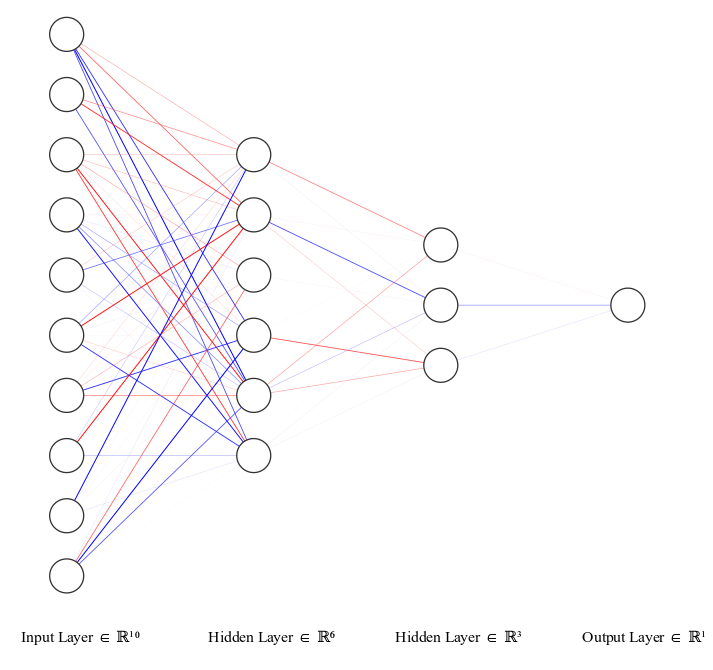

In [9]:
classifier = MLPClassifier(
    hidden_layer_sizes=(
        6,
        3,
    ),  # number of neurons in each hidden layer, first number is the number of neuron in the first hidden layer and so on
    max_iter=500,  # maximum number of epochs (the number of times we run backpropagation through the entire training set)
    learning_rate_init=0.001,  # the learning rate used in gradient descent
    activation="relu",  # RELU activation function
    solver="sgd",  # sets the type of gradient descent used
    random_state=42,
)  # random seed

### Training

This line of code runs through the backpropagation algorithm until the cost function converges onto a minimum value

In [10]:
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(6, 3), max_iter=500, random_state=42,
              solver='sgd')

### Testing

We've now trained our model and want to see how well it predicts malignancy in the test set. To do this, we pass through the cell nuclei features of each test example into the model and compare the prediction with the true diagnosis.
<br><br>
We can visualise the results using a Confusion Matrix (0 -- benign, 1 -- malignant):

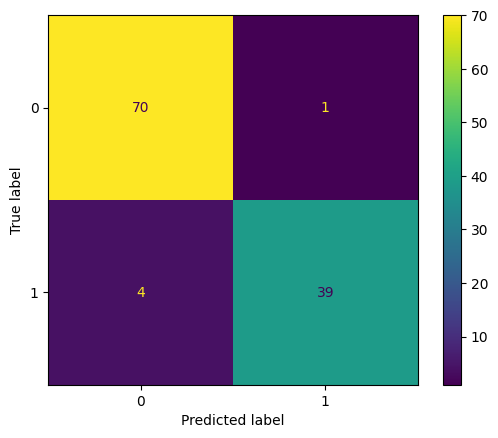

In [11]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

We can see that the model performs pretty well, with only 5 incorrect predictions out of a total of 114. We can represent this numerically by calculating the accuracy of the model:

$Accuracy = \frac{Number ~ of ~ correct ~ predictions}{Total ~ number ~ of ~ predictions} = \frac{TP + TN}{TP + TN + FP + FN},$

where:
- True Positives (TP), instances that are positive and got classified correctly
- True Negatives (TN), instances that are negative and got classified correctly
- False Positives (FP), instances that got classified as positive but are negative
- False Negatives (FN), instances that got classified as negative but are positive

In [12]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements


acc = accuracy(cm)

print(f"Accuracy of neural network = {100*acc:.2f}%")

Accuracy of neural network = 95.61%


Other useful metrics that are commonly used in classification problems are precision and recall:

Precision:
ratio of correctly predicted positive observations to the total predicted positives

Recall: ratio of correctly predicted positive observations to all actual positives

F1 Score: harmonic mean of precision and recall

$Precision = \frac{TP}{TP + FP}$

$Recall = \frac{TP}{TP + FN}$

$F1 = \frac{2}{\frac{1}{Precision}+\frac{1}{Recall}}$ or $F1 = \frac{2 \times Precision \times Recall}{Precision + Recall}$

In [13]:
precision = precision_score(y_test, y_pred, pos_label="M")
recall = recall_score(y_test, y_pred, pos_label="M")
f1 = f1_score(y_test, y_pred, pos_label="M")

print(f"Precision of neural network = {precision:.2f}")
print(f"Recall of neural network = {recall:.2f}")
print(f"F1 Score of neural network = {f1:.2f}")

Precision of neural network = 0.97
Recall of neural network = 0.91
F1 Score of neural network = 0.94


## Optimising the model

So far we have built and trained a simple neural network based only on the mean values for each cell nuclei feature. It's now your turn to build your own neural network, with the aim of getting as high an accuracy as possible. The things that you're allowed to change are the:


* Features from the original dataset that are used
* Architecture of the neural network (i.e. the number of hidden layers and the number of neurons in each layer)
* Activation function (relu, sigmoid, tanh)
* Learning rate



### Importing the dataset

In [ ]:
dataset = pd.read_csv(
    "https://raw.githubusercontent.com/ahmed-ibrahim0/AIM/main/Breast%20Cancer%20Wisconsin%20Dataset.csv"
)
dataset = dataset.drop(columns=["Unnamed: 32"], axis=1)

### Feature selection (code editing section)

Run the cell below to get a full list of the features present in the dataset:

In [ ]:
dataset.columns[2:]

Have a think about which features would help the model learn the difference between benign and malignant. Copy and paste them into the list below, separating each item by a comma and remembering to enclose each feature in apostrophes or speech marks e.g.
<br><br>
features_list = ['radius_se', 'smoothness_worst', 'fractal_dimension_mean']

In [ ]:
features_list = []  # <------------------ EDIT

### Neural Network Architecture (code editing section)

You can now define the architecture of the neural network (i.e. the number of hidden layers and the number of neurons in each), the learning rate used in gradient descent and the activation function.
<br><br>
Note that the variables must be defined in particular ways:

- Architecture - this should be expressed as a tuple, which is just a list of numbers enclosed in curved brackets. The ith element in the tuple represents the number of neurons in the ith hidden layer. For example, for the neural network we used above, we used (6,3) because the first hidden layer had 6 neurons and the second had 3.

- Activation function - this can be one of 3 functions:
- 'relu'
- 'logistic' --> this is the sigmoid function we met in the talk
- 'tanh'

Remember that the number of neurons in the input layer is dependent on how many features you select.


In [ ]:
architecture = ()  # <------------------ EDIT
activation_function = ""  # <----------- EDIT

### Training and Testing

Run the code block below to train and test the model you've designed. No edits are needed here.

In [ ]:
x_dataset = dataset[features_list]
y_dataset = dataset["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    x_dataset, y_dataset, test_size=0.2, random_state=42
)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

if "learning_rate" not in locals():
    learning_rate = 0.001

classifier = MLPClassifier(
    hidden_layer_sizes=architecture,
    learning_rate_init=learning_rate,
    activation=activation_function,
    max_iter=500,
    solver="sgd",
    random_state=42,
)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

acc = accuracy_score(y_test, y_pred)
print("ACCURACY = %.4f" % acc)

### Learning rate (code editing section)

An important variable that we haven't discussed yet is the learning rate. This is a "hyperparameter" that defines how quickly we adjust our weights during the training phase. So far, we have been using a learning rate of 0.001. Experiment below with changing the learning rate and re-running the code block above.
<br><br>
How does the learning rate affect the accuracy? Why do you think this is the case? (Hint: try using extreme values for the learning rate, does the code return any warnings?)

In [ ]:
learning_rate = ...  # <-------------------- EDIT

## Additional resources

- Interactive neural network builder: https://playground.tensorflow.org/
- Examples of Deep Learning in healthcare:
 - [Diagnosis of oesophageal cancer from endoscopic images](https://pubmed.ncbi.nlm.nih.gov/35848703/)
 - [Diagnosis of Cerebral Aneurysms from CT scans](https://pubmed.ncbi.nlm.nih.gov/31173130/)
 - [Prediction of Shock Wave Lithotripsy efficacy](https://pubmed.ncbi.nlm.nih.gov/33638143/)
 - [Diabetic retinopathy screening](https://pubmed.ncbi.nlm.nih.gov/32504495/)

---

## Part 1.2: Neural Networks in PyTorch

Let's implement the same thing but this time using a deep learning framework PyTorch.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
dataset = pd.read_csv(
    "https://raw.githubusercontent.com/ahmed-ibrahim0/AIM/main/Breast%20Cancer%20Wisconsin%20Dataset.csv"
)

Let's drop the last unnamed column and encode the diagnosis labels using categorical codes. 

1 - malignant, 0 - benign

In [ ]:
dataset.drop(columns=["Unnamed: 32"], inplace=True)
dataset["diagnosis"] = pd.Categorical(dataset["diagnosis"]).codes
dataset

Let's split the data again into a trainset and a testset.
We will use the first 10 numerical values as features and will try to predict the class malignant vs benign. 

In [ ]:
x_dataset = dataset.iloc[:, 2:12].to_numpy()
y_dataset = dataset.iloc[:, 1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    x_dataset,
    y_dataset,
    test_size=0.2,  # this says that 20% of the dataset will be allocated to the test set
    random_state=42,
)  # this sets the "seed" for the random allocation - it's not too important to understand but essentially allows us to recreate the same allocation in the future if we needed to

Since we are using PyTorch, we need to "translate" the data to the right format. PyTorch uses its own `Tensor`s.
To comply with their framework, we can also define datasets, which allow us to iterate over all samples. We will use `TensorDataset`.
Finally, a `DataLoader` is used to chunk the dataset into smaller mini-batches and allows training the model with less data at once but more frequent parameter updates!

In [ ]:
trainset = TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train))
testset = TensorDataset(
    torch.Tensor(X_test), torch.Tensor(y_test)
)  # create your datset


train_loader = DataLoader(trainset, batch_size=64)  # create your dataloader
test_loader = DataLoader(testset, batch_size=64)  # create your dataloader

Now we can define the network. PyTorch requires the layers to be specified in the class constructor (`__init__`). The initialised layers are further used to define how data flows through the network in the `forward` function. 

For example, here we specify 3 linear layers, each with different input and output feature numbers.

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        # First layer has 10 input features and outputs 32 numbers.
        self.layer1 = nn.Linear(10, 32)
        # The second layer has 32 input features and outputs 16 numbers.
        self.layer2 = nn.Linear(32, 16)
        # Since we want a yes/no answer (binary classification), the last layer takes 16 inputs and outputs a single number.
        self.layer3 = nn.Linear(16, 1)

    def forward(self, x):
        # After each layer we apply a non-linear function. Here we use ReLU.
        x = F.relu(self.layer1(x))
        # Again, we use ReLU.
        x = F.relu(self.layer2(x))
        # However, here it makes more sense to use sigmoid. It nicely squeezes all possible output values into the range 0-1.
        # Afterwards, we could set 0.5 as a natural boundary between classes.
        x = F.sigmoid(self.layer3(x))

        return x

We are almost there! Two more things to do: define an optimizer to use (in our case this is Stochastic Gradient Descent (SGD)) and a loss. A suitable loss for a binary classification task in a Binary Cross-Entropy loss.

In [ ]:
net = NeuralNet()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.1)
criterion = nn.BCELoss()

This is the training loop. You can see here that we are running the training over 500 epochs. Since this is more manual than in scikit-learn, make sure you understand what each part of this loop does and don't hesitate to consult [PyTorch documentation](https://pytorch.org/docs/stable/index.html).

In [ ]:
for epoch in range(500):  # loop over the dataset multiple times

    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward pass
        outputs = net(inputs)

        # compute loss
        loss = criterion(outputs.squeeze(), labels)

        # compute gradients with respect to network parameters
        loss.backward()

        # update the network parameters using the computed gradients
        optimizer.step()

print("Finished Training")

After we trained the network, we can make some predictions and evaluate how well the network performs!

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
labels_lst = []
preds_lst = []
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        # calculate outputs by running inputs through the network
        outputs = net(inputs).squeeze()

        predicted = torch.where(outputs >= 0.5, 1, 0)

        labels_lst.extend(labels)
        preds_lst.extend(predicted)

In [ ]:
acc = accuracy_score(labels_lst, preds_lst)
print(f"Accuracy of the network on test images: {(100*acc):.2f} %\n")

cm = confusion_matrix(labels_lst, preds_lst)
ConfusionMatrixDisplay(cm).plot()

While we did not achieve the same accuracy as when using scikit-learn, this is because have control over more elements of the training procedure. Perhaps you could change the optimiser to a more advanced `AdamW`, or modify the learning rate to see what happens? 

---

## Part 2: Medical image classification with neural networks

Make sure to run the cell below to download the necessary datasets.

In [ ]:
!pip3 install medmnist

### Training a Classifier

#### What about data?

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a `torch.*Tensor`.

-   For images, packages such as Pillow, OpenCV are useful
-   For audio, packages such as scipy and librosa
-   For text, either raw Python or Cython based loading, or NLTK and
    SpaCy are useful

Specifically for vision, we have created a package called `torchvision`,
that has data loaders for common datasets such as ImageNet, CIFAR10,
MNIST, etc. and data transformers for images, viz.,
`torchvision.datasets` and `torch.utils.data.DataLoader`.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the Pneumonia part of the [MedMNIST dataset](https://medmnist.com). 

#### Training an image classifier

We will do the following steps in order:

1.  Load and normalize the MedMNIST training and test datasets
2.  Define a Neural Network
3.  Define a loss function
4.  Train the network on the training data
5.  Test the network on the test data


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
from medmnist import PneumoniaMNIST

The output of torchvision datasets are PILImage images of range \[0,
1\]. We transform them to Tensors of normalized range \[-1, 1\].


<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>If running on Windows and you get a BrokenPipeError, try settingthe num_worker of torch.utils.data.DataLoader() to 0.</p>

</div>



In [ ]:
# define a sequential transform to 1) change the input data type to Tensors and 2) normalise them.
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5), (0.5))]
)

batch_size = 4

# Load the train set of the images
trainset = PneumoniaMNIST("train", transform=transform, download=True, size=28)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True
)

# Load the test set of the images
testset = PneumoniaMNIST("test", transform=transform, download=True, size=28)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True
)

classes = ("normal", "pneumonia")

Let us show some of the training images.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(" ".join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))

### Define a simple Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class LinearNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 120)
        self.fc2 = nn.Linear(120, 48)
        self.fc3 = nn.Linear(48, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten the image into a long vector!

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))  # remember to apply sigmoid on the final output
        return x

### Define a Loss function and optimizer

Let\'s use a Binary Cross-Entropy loss and AdamW optimiser, a gradient-based method.


In [ ]:
import torch.optim as optim

net = LinearNet()
criterion = nn.BCELoss()
optimizer = optim.AdamW(net.parameters(), lr=0.001)

### Train the network

This is when things start to get interesting. We simply have to loop
over our data iterator, and feed the inputs to the network and optimize.


In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        loss = criterion(outputs, labels.to(torch.float))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:  # print every 2000 mini-batches
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200}")
            running_loss = 0.0

print("Finished Training")

### Test the network on the test data

We have trained the network for 2 passes over the training dataset. But
we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get
familiar.


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print("GroundTruth: ", " ".join(f"{classes[labels[j]]:5s}" for j in range(4)))

Okay, now let us see what the neural network thinks these examples above
are:


In [ ]:
outputs = net(images)

The outputs are values between 0 and 1. Hence, we can use 0.5 as a natural boundary between normal and pneumonia. 


In [ ]:
predicted = torch.where(outputs >= 0.5, 1, 0)

print("Predicted: ", " ".join(f"{classes[predicted[j]]:5s}" for j in range(4)))

The results seem pretty good.

Let us look at how the network performs on the whole dataset.


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
labels_lst = []
preds_lst = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)

        predicted = torch.where(outputs >= 0.5, 1, 0)

        labels_lst.extend(labels)
        preds_lst.extend(predicted)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


acc = accuracy_score(labels_lst, preds_lst)
print(f"Accuracy of the network on test images: {(100*acc):.2f} %\n")

cm = confusion_matrix(labels_lst, preds_lst)
ConfusionMatrixDisplay(cm).plot()

That looks way better than chance, which is 50% accuracy. Seems like the network learnt something!

## Extra content: Convolutional Neural Networks

While this works, you may be thinking that by flattening the image we are losing significant amount of spatial information in the image (e.g. the relative position of two objects)...

...and you're right! PyTorch gives us a lot of flexibility in defining our own network architecture. Hence, we can use Convolutional Neural Networks, which revolutionised how computer vision problems are approached nowadays! 

CNNs have 2 fundamental building blocks: 
- convolutional layers, which consist of several learnable filters (kernels) scanning through an image and extracting desired features
- pooling layers, which decrease the spatial dimensions of the image and help focusing only on the most important features

After a series of alternating convolutional and pooling layers, the spatial information has been already utilised and the representation can be flattened into a long vector, just as we did it above. From now on, the network uses simple fully-connected linear layers. 

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)


### Network definition

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 5)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 48)
        self.fc3 = nn.Linear(48, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x

In [ ]:
import torch.optim as optim

net = ConvNet()
criterion = nn.BCELoss()
optimizer = optim.AdamW(net.parameters(), lr=0.001)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        loss = criterion(outputs, labels.to(torch.float))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:  # print every 2000 mini-batches
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200}")
            running_loss = 0.0

print("Finished Training")

In [ ]:
correct = 0
total = 0

labels_lst = []
preds_lst = []

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)

        predicted = torch.where(outputs >= 0.5, 1, 0)

        labels_lst.extend(labels)
        preds_lst.extend(predicted)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


acc = accuracy_score(labels_lst, preds_lst)
print(f"Accuracy of the network on test images: {(100*acc):.2f} %\n")

cm = confusion_matrix(labels_lst, preds_lst)
ConfusionMatrixDisplay(cm).plot()

Okay, so what next?

How do we run these neural networks on the GPU?

## Extra content: Training on GPU

Just like how you transfer a Tensor onto the GPU, you transfer the
neural net onto the GPU.

Let\'s first define our device as the first visible cuda device if we
have CUDA available:


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

The rest of this section assumes that `device` is a CUDA device.

Then these methods will recursively go over all modules and convert
their parameters and buffers to CUDA tensors:

``` {.python}
net.to(device)
```

Remember that you will have to send the inputs and targets at every step
to the GPU too:

``` {.python}
inputs, labels = data[0].to(device), data[1].to(device)
```

Why don\'t I notice MASSIVE speedup compared to CPU? Because your
network is really small.

**Exercise:** Try increasing the width of your network (argument 2 of
the first `nn.Conv2d`, and argument 1 of the second `nn.Conv2d` -- they
need to be the same number), see what kind of speedup you get.